# Importing all the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data collection and preprocessing

In [2]:
calories = pd.read_csv('C:/Users/Hemant/jupyter_codes/ML Project 1/Calories burnt prediction/calories.csv')
exercise = pd.read_csv('C:/Users/Hemant/jupyter_codes/ML Project 1/Calories burnt prediction/exercise.csv')

Combining the two dataframes

In [3]:
calories_data = pd.concat([exercise, calories['Calories']], axis = 1)

In [4]:
# print the first 5 rows of the dataset
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
# shape of the dataset
calories_data.shape

(15000, 9)

In [6]:
# Getting some info about the dataset
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
# Checking for any missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

#  Data analysis

In [8]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data visualization

In [9]:
sns.set_style(style = 'darkgrid')

<function matplotlib.pyplot.show(close=None, block=None)>

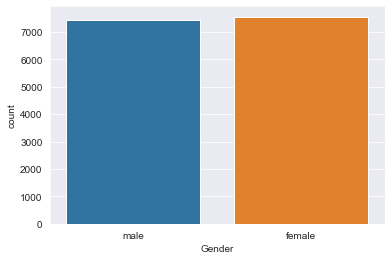

In [10]:
# plotting the gender column in a count plot
sns.countplot(x = 'Gender', data = calories_data)
plt.show

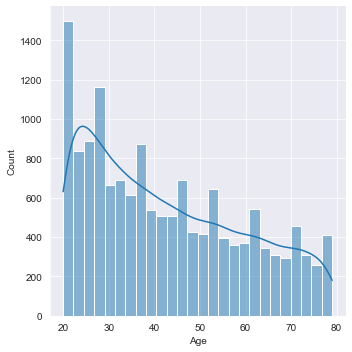

In [11]:
# distribution plot for age column
sns.displot(calories_data['Age'], kde = True)

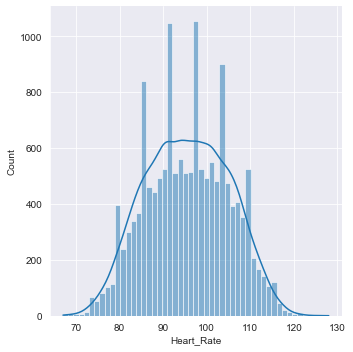

In [12]:
# distribution plot for heart_rate column
sns.displot(calories_data['Heart_Rate'], kde = True)

In [13]:
# Correlation between the data points
correlation = calories_data.corr()

In [14]:
correlation

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<AxesSubplot:>

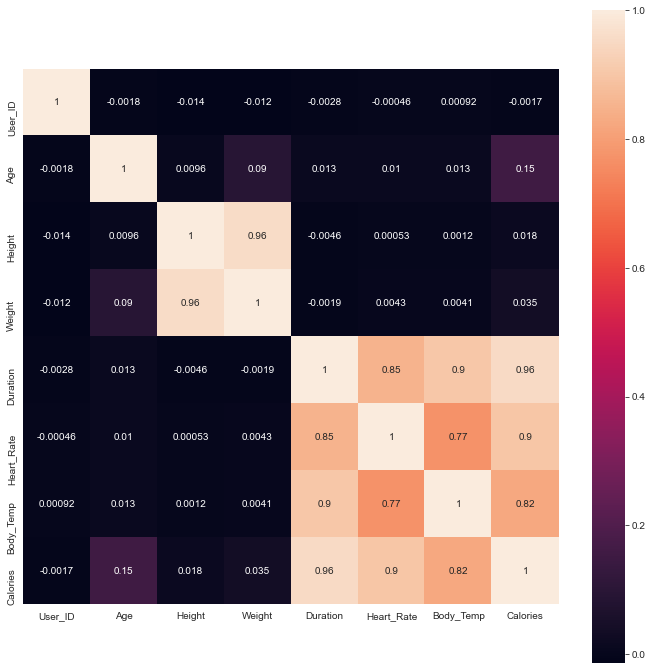

In [15]:
# Constructing a heatmap to understand the correlation

plt.figure(figsize = (12, 12))
sns.heatmap(correlation, annot = True, annot_kws = {'size' : 10}, square = True)

# Splitting the data into training and testing data

In [19]:
# Cconverting the text data into numerical data
calories_data.replace({"Gender":{'female':0,'male':1}}, inplace = True)
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [20]:
# Splitting the various features and labels
X = calories_data.drop(columns = ['User_ID','Calories'], axis = 1)
Y = calories_data['Calories']

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  int64  
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 820.4 KB


In [22]:
# splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state =2)

In [23]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(12000, 7) (3000, 7)
(12000,) (3000,)


# Model training and evaluation

Model training:

XGB Regressor

In [24]:
model = XGBRegressor()

In [25]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Model evaluation:

Mean absolute error

In [27]:
#on training data
training_prediction = model.predict(x_train)

training_accuracy = metrics.mean_absolute_error(y_train, training_prediction)
print('ACCURACY ON TRAINING DATA : ', training_accuracy)

ACCURACY ON TRAINING DATA :  0.9656331550205747


In [28]:
#on testing data
testing_prediction = model.predict(x_test)

testing_accuracy = metrics.mean_absolute_error(y_test, testing_prediction)
print('ACCURACY ON TESTING DATA : ', testing_accuracy)

ACCURACY ON TESTING DATA :  1.4807048829992613


In [32]:
print(y_test[0:10])

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
9760      27.0
4952      60.0
14125     58.0
10285    108.0
7418      31.0
Name: Calories, dtype: float64


In [30]:
print(testing_prediction[0:10])

[127.823784 226.00154   38.66253    6.14256  135.13007   28.07316
  59.63968   59.89957  103.41656   30.413578]
